

#### PERFORMANCE ANALYSIS OF MACHINE LEARNING ALGORITHMS FOR MONITORING HUMAN ACTIVITY RECOGNITION 





#### LOGISTICS REGRESSION

The purpose of this thesis is to predict human behavior based upon wearable sensor data and Smartphone data and perform a comparative study of performance between multiple classification algorithms. We will be using publicly available UCI data set for this study. As this data is not derived from our experiment, so it becomes crucial to check the dataset for all the data quality issues. Otherwise, data quality issues can provide irrelevant results, so in order to prepare data for building models,

1. Data load
2. Standardization of the datset
3. Splitting of Original Dataset between test and train
4. Model Building

**** 1. Data Load***

***

In [1]:
### import all the required Library

import pandas as pd
import numpy as np
import glob
import missingno as msno 
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Load the data 
df_data_Dummy=pd.read_csv("df_data_Dummy.csv")

In [4]:
df_data_Dummy.head()

,Time_Sec,Acc_Front_axis,Acc_vert_axis,Acc_Lat_axis,id_Antenna,RSSI,Phase,Freq,Activity Label,Room_2,Gender_M
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,0,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,0,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,0,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,0,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,0,1


**2. Divide between X and Y**

In [5]:
Output =['Activity Label']
Features=['Time_Sec', 'Acc_Front_axis', 'Acc_vert_axis', 'Acc_Lat_axis',
      'id_Antenna', 'RSSI', 'Phase', 'Freq']

In [6]:
## Devide the data between X and Y
X= df_data_Dummy.drop(Output,1)
Y=df_data_Dummy[Output]

In [7]:
#Standardize the inputs
normalize=Normalizer()
#features = 
X[Features] = normalize.fit_transform(X[Features])

from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#X[Features] = scaler.fit_transform(X[Features])

In [8]:
## Print X after normalization
X

,Time_Sec,Acc_Front_axis,Acc_vert_axis,Acc_Lat_axis,id_Antenna,RSSI,Phase,Freq,Room_2,Gender_M
0,0.000000,0.000294,0.001088,-0.000089,0.001079,-0.068542,0.002618,0.997644,0,1
1,0.000541,0.000294,0.001091,-0.000089,0.001082,-0.068188,0.005127,0.997658,0,1
2,0.001620,0.000484,0.000990,-0.000015,0.001080,-0.068579,0.003274,0.997638,0,1
3,0.001895,0.000485,0.000992,-0.000015,0.001083,-0.068226,0.002206,0.997664,0,1
4,0.002710,0.000371,0.001043,-0.000064,0.001084,-0.068838,0.006387,0.997603,0,1
5,0.003508,0.000370,0.001039,-0.000064,0.004317,-0.060983,0.001356,0.998122,0,1
6,0.004325,0.000332,0.001078,-0.000076,0.001081,-0.068652,0.004186,0.997621,0,1
7,0.005397,0.000294,0.001076,-0.000101,0.001079,-0.069079,0.002692,0.997592,0,1
8,0.005933,0.000255,0.001112,-0.000138,0.001079,-0.069578,0.002166,0.997555,0,1
9,0.006465,0.000255,0.001111,-0.000138,0.001077,-0.071111,0.001283,0.997445,0,1


In [9]:
Features1=Features[1]
Features2=Features[2]
Features3=Features[3]

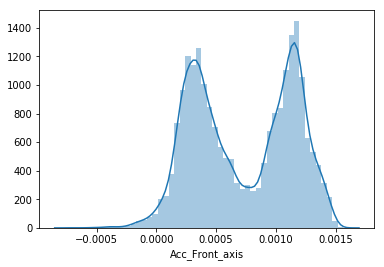

In [10]:
sns.distplot(X[Features1])
plt.show()

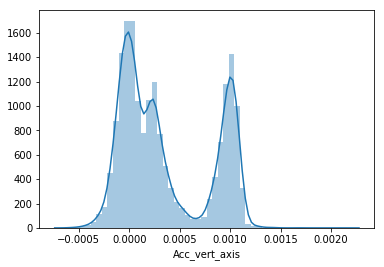

In [11]:
sns.distplot(X[Features2])
plt.show()
plt.show()

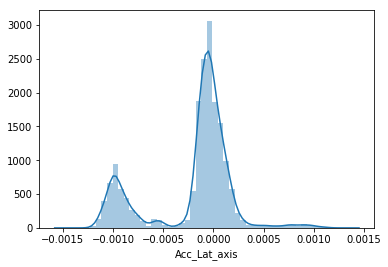

In [12]:
sns.distplot(X[Features3])
plt.show()

In [13]:
## Split the data between test and train split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size = 0.7,test_size =0.3,random_state =100)

#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [14]:
X_train.shape

(52589, 10)

In [15]:
Y_test.shape

(22539, 1)

In [16]:
Model_Name="Logistics Regression"

#### 4. Model build & Evaluation 

- *We will be buidling below model and do the comparison between these model* 

1. Logistics Regression
2. KNN Regressoion Algorithm
3. SVM Algorithm
4. Random Forest
5. GBM
5. Deep Neural Network

**1. Logistics Regression Hyper tunning parameter**

In [17]:
# Creating the hyperparameter grid 

import time

#penalty = ['11','12'] 
penalty = ['l1', 'l2']
C =[0.001,0.01,0.1,1,10,100,1000,10000]
dual=[True,False]
max_iter=[100,110,120,130,140]
#param_grid = dict(dual=dual,max_iter=max_iter,penalty=penalty,C=C)
param_grid = dict(C=C,penalty=penalty,)

# Instantiating logistic regression classifier 
lr = LogisticRegression() 

# Instantiating the GridSearchCV object 
grid = GridSearchCV(lr, param_grid, cv = 5,scoring='accuracy') 

start_time = time.time()
  
grid_result =grid.fit(X_train,Y_train)




In [18]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.923444 using {'C': 10000, 'penalty': 'l1'}
Execution time: 1352.3698348999023 ms


In [19]:
cv_results = pd.DataFrame(grid_result.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.287348,0.031715,0.001656,0.001686,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.686282,0.686347,0.686347,0.686347,0.686383,0.686341,0.000033,14,0.686356,0.686340,0.686340,0.686340,0.686331,0.686341,0.000008
1,0.402390,0.019793,0.003297,0.001734,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.686282,0.686347,0.686347,0.686347,0.686383,0.686341,0.000033,14,0.686356,0.686340,0.686340,0.686340,0.686331,0.686341,0.000008
2,0.620565,0.082444,0.004301,0.000444,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.700732,0.700323,0.695569,0.696140,0.699506,0.698454,0.002166,10,0.697908,0.698224,0.699009,0.698961,0.697930,0.698407,0.000486
3,0.660206,0.052778,0.004788,0.001099,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.686282,0.686347,0.686347,0.686347,0.686383,0.686341,0.000033,14,0.686356,0.686340,0.686340,0.686340,0.686331,0.686341,0.000008
4,2.337799,1.076598,0.004592,0.001732,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.687708,0.688724,0.684351,0.685016,0.687619,0.686684,0.001692,13,0.686237,0.686268,0.686744,0.686934,0.686355,0.686508,0.000280
5,0.641846,0.027265,0.005941,0.001713,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.690465,0.691957,0.686918,0.688059,0.690662,0.689612,0.001844,11,0.689636,0.689667,0.689905,0.690119,0.689658,0.689797,0.000188
6,16.906842,1.453393,0.003291,0.002026,1,l1,"{'C': 1, 'penalty': 'l1'}",0.892290,0.892185,0.891044,0.893136,0.892069,0.892145,0.000667,6,0.892108,0.892325,0.892206,0.891802,0.892187,0.892126,0.000176
7,0.898018,0.050415,0.004868,0.000654,1,l2,"{'C': 1, 'penalty': 'l2'}",0.689134,0.688439,0.685872,0.687013,0.688950,0.687881,0.001250,12,0.687378,0.687576,0.688669,0.688051,0.687448,0.687824,0.000483
8,40.131692,6.889492,0.003260,0.001504,10,l1,"{'C': 10, 'penalty': 'l1'}",0.910258,0.909108,0.911105,0.912436,0.913750,0.911331,0.001626,4,0.913026,0.913028,0.910722,0.909890,0.912747,0.911883,0.001318
9,1.208916,0.071971,0.003344,0.001754,10,l2,"{'C': 10, 'penalty': 'l2'}",0.708242,0.704887,0.701464,0.704031,0.704070,0.704539,0.002180,9,0.703304,0.704571,0.705688,0.704191,0.704347,0.704420,0.000766


In [20]:
k=cv_results[['param_C','param_penalty','mean_test_score','mean_train_score']]
File_Name=Model_Name+'_Hypertune.csv'
k.to_csv(File_Name,index=False)

In [21]:
cv_results=cv_results[(cv_results.param_penalty =='l1') & (cv_results.param_C >= 100)]

In [22]:
cv_results[['param_C','param_penalty','mean_test_score','mean_train_score']]

,param_C,param_penalty,mean_test_score,mean_train_score
10,100,l1,0.922779,0.922959
12,1000,l1,0.923406,0.923610
14,10000,l1,0.923444,0.923767


Text(0.5, 0, 'param_C')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and C')

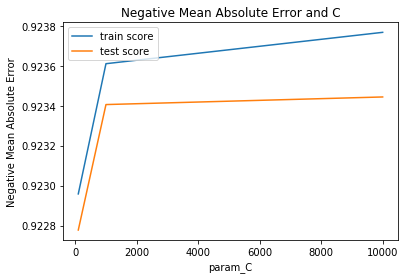

In [23]:
# plotting mean test and train scoes with alpha 


# plotting
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('param_C')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and C")
plt.legend(['train score', 'test score'], loc='upper left')
#plt.show()
File_Name=Model_Name+'_HyperTune.png'
plt.savefig(File_Name)

In [24]:
## Logistics Regression
import time
start_time = time.time()
Model1= LogisticRegression(C=1000, penalty='l1', solver = 'liblinear',random_state=0)


In [25]:
#fit model on Train data 
Model1.fit(X_train,Y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
Model1_duration=time.time()-start_time

In [27]:
Model1_duration

82.6291151046753

In [28]:
#Y = label_binarize(Y, classes=[1, 2, 3,4])
#n_classes = Y.shape[1]

In [29]:
## Predict train score for training data  
Y_train_pred=Model1.predict(X_train)

In [30]:
Y_test_pred=Model1.predict(X_test)

In [31]:
## Confusion matrix for Logistics regression
cm_Model1 = metrics.confusion_matrix(Y_test,Y_test_pred,labels=[1, 2, 3,4])
print(cm_Model1)

[[ 4753   130   119     8]
 [  949   446     0     7]
 [    3     4 15419     0]
 [  408    40     2   251]]


<Figure size 720x720 with 0 Axes>

Text(0, 0.5, 'Actual label')

Text(0.5, 0, 'Predicted label')

Text(0.5, 1.05, 'Accuracy Score: 0.925906207018945')

<Figure size 720x720 with 0 Axes>

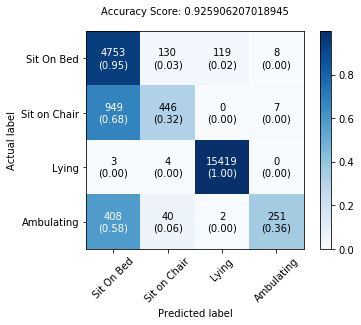

In [32]:
from mlxtend.plotting import plot_confusion_matrix

plt.figure(figsize=(10,10))
class_names=["Sit On Bed", "Sit on Chair", "Lying", "Ambulating"]
ax = plot_confusion_matrix(cm_Model1,
                                colorbar=True,show_normed=True ,class_names=class_names)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Model1.score(X_test, Y_test))
plt.title(all_sample_title, size = 10);
File_Name=Model_Name+'_confusion.png'
plt.savefig(File_Name)

#plt.show()

**precision**

 >The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
 
**Recall** 
 >The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

**F-beta score**
 >The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.


In [33]:
from sklearn.metrics import classification_report
classificationReport = classification_report(Y_test, Y_test_pred, target_names=class_names,output_dict=True)

In [34]:
print(classificationReport)


{'Sit On Bed': {'precision': 0.7775233109766072, 'recall': 0.9487025948103792, 'f1-score': 0.8546255506607929, 'support': 5010}, 'Sit on Chair': {'precision': 0.7193548387096774, 'recall': 0.3181169757489301, 'f1-score': 0.44114737883283883, 'support': 1402}, 'Lying': {'precision': 0.9922136422136422, 'recall': 0.9995462206664074, 'f1-score': 0.9958664341535878, 'support': 15426}, 'Ambulating': {'precision': 0.943609022556391, 'recall': 0.35805991440798857, 'f1-score': 0.5191313340227507, 'support': 701}, 'micro avg': {'precision': 0.925906207018945, 'recall': 0.925906207018945, 'f1-score': 0.925906207018945, 'support': 22539}, 'macro avg': {'precision': 0.8581752036140794, 'recall': 0.6561064264084262, 'f1-score': 0.7026926744174925, 'support': 22539}, 'weighted avg': {'precision': 0.9260075798155838, 'recall': 0.925906207018945, 'f1-score': 0.9151386180548119, 'support': 22539}}


In [35]:
df_performance=pd.DataFrame(classificationReport)
df_performance=df_performance.reset_index()
print(df_performance)

       index   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0   f1-score     0.854626      0.441147      0.995866    0.519131   
1  precision     0.777523      0.719355      0.992214    0.943609   
2     recall     0.948703      0.318117      0.999546    0.358060   
3    support  5010.000000   1402.000000  15426.000000  701.000000   

      micro avg     macro avg  weighted avg  
0      0.925906      0.702693      0.915139  
1      0.925906      0.858175      0.926008  
2      0.925906      0.656106      0.925906  
3  22539.000000  22539.000000  22539.000000  


In [36]:
print(df_performance.head())

       index   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0   f1-score     0.854626      0.441147      0.995866    0.519131   
1  precision     0.777523      0.719355      0.992214    0.943609   
2     recall     0.948703      0.318117      0.999546    0.358060   
3    support  5010.000000   1402.000000  15426.000000  701.000000   

      micro avg     macro avg  weighted avg  
0      0.925906      0.702693      0.915139  
1      0.925906      0.858175      0.926008  
2      0.925906      0.656106      0.925906  
3  22539.000000  22539.000000  22539.000000  


In [37]:
#Logistics_df
df_performance.rename(columns={'index':'Perfomance Matrix'}, inplace=True)
df_performance

,Perfomance Matrix,Sit On Bed,Sit on Chair,Lying,Ambulating,micro avg,macro avg,weighted avg
0,f1-score,0.854626,0.441147,0.995866,0.519131,0.925906,0.702693,0.915139
1,precision,0.777523,0.719355,0.992214,0.943609,0.925906,0.858175,0.926008
2,recall,0.948703,0.318117,0.999546,0.358060,0.925906,0.656106,0.925906
3,support,5010.000000,1402.000000,15426.000000,701.000000,22539.000000,22539.000000,22539.000000


In [38]:
df_performance=df_performance.append({'Perfomance Matrix':"Training Accuracy" ,'macro avg' :Model1.score(X_train, Y_train) },ignore_index = True)
print(df_performance)    

   Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0           f1-score     0.854626      0.441147      0.995866    0.519131   
1          precision     0.777523      0.719355      0.992214    0.943609   
2             recall     0.948703      0.318117      0.999546    0.358060   
3            support  5010.000000   1402.000000  15426.000000  701.000000   
4  Training Accuracy          NaN           NaN           NaN         NaN   

      micro avg     macro avg  weighted avg  
0      0.925906      0.702693      0.915139  
1      0.925906      0.858175      0.926008  
2      0.925906      0.656106      0.925906  
3  22539.000000  22539.000000  22539.000000  
4           NaN      0.923976           NaN  


In [39]:
df_performance=df_performance.append({'Perfomance Matrix':"Test Accuracy" ,'macro avg' :Model1.score(X_test, Y_test) },ignore_index = True)
print(df_performance)    

   Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0           f1-score     0.854626      0.441147      0.995866    0.519131   
1          precision     0.777523      0.719355      0.992214    0.943609   
2             recall     0.948703      0.318117      0.999546    0.358060   
3            support  5010.000000   1402.000000  15426.000000  701.000000   
4  Training Accuracy          NaN           NaN           NaN         NaN   
5      Test Accuracy          NaN           NaN           NaN         NaN   

      micro avg     macro avg  weighted avg  
0      0.925906      0.702693      0.915139  
1      0.925906      0.858175      0.926008  
2      0.925906      0.656106      0.925906  
3  22539.000000  22539.000000  22539.000000  
4           NaN      0.923976           NaN  
5           NaN      0.925906           NaN  


In [40]:
df_performance=df_performance.append({'Perfomance Matrix':"Model_Time" ,'macro avg' :Model1_duration },ignore_index = True)
print(df_performance)

   Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0           f1-score     0.854626      0.441147      0.995866    0.519131   
1          precision     0.777523      0.719355      0.992214    0.943609   
2             recall     0.948703      0.318117      0.999546    0.358060   
3            support  5010.000000   1402.000000  15426.000000  701.000000   
4  Training Accuracy          NaN           NaN           NaN         NaN   
5      Test Accuracy          NaN           NaN           NaN         NaN   
6         Model_Time          NaN           NaN           NaN         NaN   

      micro avg     macro avg  weighted avg  
0      0.925906      0.702693      0.915139  
1      0.925906      0.858175      0.926008  
2      0.925906      0.656106      0.925906  
3  22539.000000  22539.000000  22539.000000  
4           NaN      0.923976           NaN  
5           NaN      0.925906           NaN  
6           NaN     82.629115           NaN  


In [41]:
## Check False Positive/Negative True Postive/Negative

FP = cm_Model1.sum(axis=0) - np.diag(cm_Model1)  
FN = cm_Model1.sum(axis=1) - np.diag(cm_Model1)
TP = np.diag(cm_Model1)
TN = cm_Model1.sum() - (FP + FN + TP)

print(FP,FN,TP,TN)

[1360  174  121   15] [257 956   7 450] [ 4753   446 15419   251] [16169 20963  6992 21823]


In [42]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [43]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
print(FDR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

PLR = TPR/(1-TNR)
print(PLR)


NLR =TNR/(1-TPR)
print(NLR)

OMR=(FP+FN)/(TP+FN+FP+TN)
print(OMR)

NNE=1/PPV

print(NNE)

[0.94870259 0.31811698 0.99954622 0.35805991]
[0.92241428 0.99176799 0.98298889 0.99931312]
[0.77752331 0.71935484 0.99221364 0.94360902]
[0.98435407 0.95638487 0.99899986 0.97979617]
[0.07758572 0.00823201 0.01701111 0.00068688]
[5.12974052e-02 6.81883024e-01 4.53779334e-04 6.41940086e-01]
[0.22247669 0.28064516 0.00778636 0.05639098]
[0.92825769 0.94986468 0.99432095 0.97936909]
[ 12.22779984  38.64389952  58.75844849 521.28749406]
[1.79816948e+01 1.45445473e+00 2.16622667e+03 1.55670778e+00]
[0.07174231 0.05013532 0.00567905 0.02063091]
[1.28613507 1.39013453 1.00784746 1.05976096]


In [44]:
df_performance.columns

Index(['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'micro avg', 'macro avg', 'weighted avg'],
      dtype='object')

In [45]:
df_performance=df_performance.append({'Perfomance Matrix':"Specificity" ,'Sit On Bed' :TNR[0] ,'Sit on Chair':TNR[1] ,'Lying':TNR[2],'Ambulating':TNR[3]},ignore_index = True)
print(df_performance)

   Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  Ambulating  \
0           f1-score     0.854626      0.441147      0.995866    0.519131   
1          precision     0.777523      0.719355      0.992214    0.943609   
2             recall     0.948703      0.318117      0.999546    0.358060   
3            support  5010.000000   1402.000000  15426.000000  701.000000   
4  Training Accuracy          NaN           NaN           NaN         NaN   
5      Test Accuracy          NaN           NaN           NaN         NaN   
6         Model_Time          NaN           NaN           NaN         NaN   
7        Specificity     0.922414      0.991768      0.982989    0.999313   

      micro avg     macro avg  weighted avg  
0      0.925906      0.702693      0.915139  
1      0.925906      0.858175      0.926008  
2      0.925906      0.656106      0.925906  
3  22539.000000  22539.000000  22539.000000  
4           NaN      0.923976           NaN  
5           NaN      0.925906 

In [46]:
df_performance=df_performance.append({'Perfomance Matrix':"Negative predictive value" ,'Sit On Bed' :NPV[0] ,'Sit on Chair':NPV[1] ,'Lying':NPV[2],'Ambulating':NPV[3]},ignore_index = True)
print(df_performance)

           Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  \
0                   f1-score     0.854626      0.441147      0.995866   
1                  precision     0.777523      0.719355      0.992214   
2                     recall     0.948703      0.318117      0.999546   
3                    support  5010.000000   1402.000000  15426.000000   
4          Training Accuracy          NaN           NaN           NaN   
5              Test Accuracy          NaN           NaN           NaN   
6                 Model_Time          NaN           NaN           NaN   
7                Specificity     0.922414      0.991768      0.982989   
8  Negative predictive value     0.984354      0.956385      0.999000   

   Ambulating     micro avg     macro avg  weighted avg  
0    0.519131      0.925906      0.702693      0.915139  
1    0.943609      0.925906      0.858175      0.926008  
2    0.358060      0.925906      0.656106      0.925906  
3  701.000000  22539.000000  22539.00

In [47]:
df_performance=df_performance.append({'Perfomance Matrix':"Positive Likelihood Ratio" ,'Sit On Bed' :PLR[0] ,'Sit on Chair':PLR[1] ,'Lying':PLR[2],'Ambulating':PLR[3]},ignore_index = True)
print(df_performance)

           Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  \
0                   f1-score     0.854626      0.441147      0.995866   
1                  precision     0.777523      0.719355      0.992214   
2                     recall     0.948703      0.318117      0.999546   
3                    support  5010.000000   1402.000000  15426.000000   
4          Training Accuracy          NaN           NaN           NaN   
5              Test Accuracy          NaN           NaN           NaN   
6                 Model_Time          NaN           NaN           NaN   
7                Specificity     0.922414      0.991768      0.982989   
8  Negative predictive value     0.984354      0.956385      0.999000   
9  Positive Likelihood Ratio    12.227800     38.643900     58.758448   

   Ambulating     micro avg     macro avg  weighted avg  
0    0.519131      0.925906      0.702693      0.915139  
1    0.943609      0.925906      0.858175      0.926008  
2    0.358060      0.9

In [48]:
df_performance=df_performance.append({'Perfomance Matrix':"Negative likelihood ratio " ,'Sit On Bed' :NLR[0] ,'Sit on Chair':NLR[1] ,'Lying':NLR[2],'Ambulating':NLR[3]},ignore_index = True)
print(df_performance)

             Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  \
0                     f1-score     0.854626      0.441147      0.995866   
1                    precision     0.777523      0.719355      0.992214   
2                       recall     0.948703      0.318117      0.999546   
3                      support  5010.000000   1402.000000  15426.000000   
4            Training Accuracy          NaN           NaN           NaN   
5                Test Accuracy          NaN           NaN           NaN   
6                   Model_Time          NaN           NaN           NaN   
7                  Specificity     0.922414      0.991768      0.982989   
8    Negative predictive value     0.984354      0.956385      0.999000   
9    Positive Likelihood Ratio    12.227800     38.643900     58.758448   
10  Negative likelihood ratio     17.981695      1.454455   2166.226667   

    Ambulating     micro avg     macro avg  weighted avg  
0     0.519131      0.925906      0.7026

In [49]:
df_performance=df_performance.append({'Perfomance Matrix':"Overall Misclassification Ratio" ,'Sit On Bed' :OMR[0] ,'Sit on Chair':OMR[1] ,'Lying':OMR[2],'Ambulating':OMR[3]},ignore_index = True)
print(df_performance)

                  Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  \
0                          f1-score     0.854626      0.441147      0.995866   
1                         precision     0.777523      0.719355      0.992214   
2                            recall     0.948703      0.318117      0.999546   
3                           support  5010.000000   1402.000000  15426.000000   
4                 Training Accuracy          NaN           NaN           NaN   
5                     Test Accuracy          NaN           NaN           NaN   
6                        Model_Time          NaN           NaN           NaN   
7                       Specificity     0.922414      0.991768      0.982989   
8         Negative predictive value     0.984354      0.956385      0.999000   
9         Positive Likelihood Ratio    12.227800     38.643900     58.758448   
10       Negative likelihood ratio     17.981695      1.454455   2166.226667   
11  Overall Misclassification Ratio     

In [50]:
from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[1, 2, 3,4])
y_test=label_binarize(Y_test, classes=[1, 2, 3,4])
n_classes = Y.shape[1]

In [51]:
y_test

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

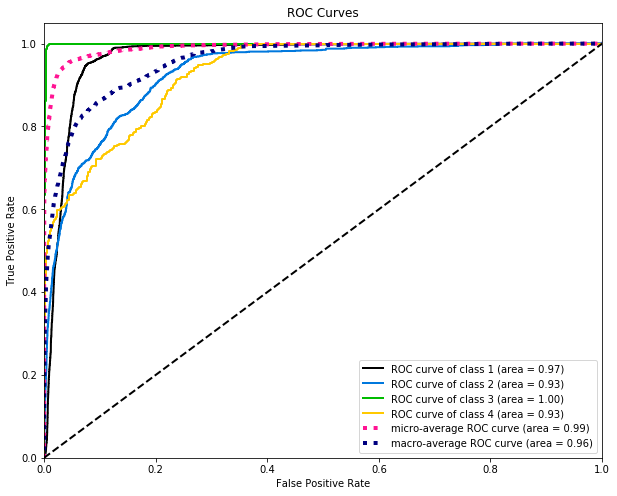

In [52]:
import scikitplot as skplt
y_probas = Model1.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
File_Name=Model_Name+'_ROC.png'
plt.savefig(File_Name)

In [53]:
    from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_probas)

In [54]:
auc

0.9571472232818308

In [55]:
df_performance.columns

Index(['Perfomance Matrix', 'Sit On Bed', 'Sit on Chair', 'Lying',
       'Ambulating', 'micro avg', 'macro avg', 'weighted avg'],
      dtype='object')

In [56]:
df_performance=df_performance.append({'Perfomance Matrix':"ROC curve_Avergae" ,'macro avg':auc},ignore_index = True)
print(df_performance)

                  Perfomance Matrix   Sit On Bed  Sit on Chair         Lying  \
0                          f1-score     0.854626      0.441147      0.995866   
1                         precision     0.777523      0.719355      0.992214   
2                            recall     0.948703      0.318117      0.999546   
3                           support  5010.000000   1402.000000  15426.000000   
4                 Training Accuracy          NaN           NaN           NaN   
5                     Test Accuracy          NaN           NaN           NaN   
6                        Model_Time          NaN           NaN           NaN   
7                       Specificity     0.922414      0.991768      0.982989   
8         Negative predictive value     0.984354      0.956385      0.999000   
9         Positive Likelihood Ratio    12.227800     38.643900     58.758448   
10       Negative likelihood ratio     17.981695      1.454455   2166.226667   
11  Overall Misclassification Ratio     

In [57]:
df_performance

,Perfomance Matrix,Sit On Bed,Sit on Chair,Lying,Ambulating,micro avg,macro avg,weighted avg
0,f1-score,0.854626,0.441147,0.995866,0.519131,0.925906,0.702693,0.915139
1,precision,0.777523,0.719355,0.992214,0.943609,0.925906,0.858175,0.926008
2,recall,0.948703,0.318117,0.999546,0.358060,0.925906,0.656106,0.925906
3,support,5010.000000,1402.000000,15426.000000,701.000000,22539.000000,22539.000000,22539.000000
4,Training Accuracy,NaN,NaN,NaN,NaN,NaN,0.923976,NaN
5,Test Accuracy,NaN,NaN,NaN,NaN,NaN,0.925906,NaN
6,Model_Time,NaN,NaN,NaN,NaN,NaN,82.629115,NaN
7,Specificity,0.922414,0.991768,0.982989,0.999313,NaN,NaN,NaN
8,Negative predictive value,0.984354,0.956385,0.999000,0.979796,NaN,NaN,NaN
9,Positive Likelihood Ratio,12.227800,38.643900,58.758448,521.287494,NaN,NaN,NaN


In [58]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_probas[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_probas[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
   y_probas.ravel())
average_precision["micro"] = average_precision_score(y_test, y_probas,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.98


In [61]:
df_performance['Model1']= Model_Name
df_performance['Data Type']= "Wearable Sensor Data"
File_Name=Model_Name + '.csv'

In [62]:
df_performance.to_csv(File_Name,index=False)
